# Introduction

##### This project is based on a KPI procurement dataset where supply chain teams are struggling to identify key business problems such as Underperforming suppliers, Costs impacting operations, Rising costs due to inflation or poor negotiations, Future price trends, and Inefficiencies in the ordering and delivery process that slow down operations

##### This project aims to support supplier relationship management and cost optimization by extracting and compiling important data from the csv file and convert them into visuals and tables that reflect clear statistics if supplier compliance, prices, and more. 

# Questions: 
##### What are ways we could improve the data set? 
##### Which vendors are high risk? And why are they high risk?
##### How can we analyze the efficiency of the supply chain?
##### What is the best way to optimize costs?
##### What are the causes of policy violations and how often have they happened?
##### What factors seem to worsen and enhance vendor performance?
##### What could we predict about prices in the near future?
##### Are there significant price increases over time for the same items? Savings from bulk orders?
##### Are there duplicate purchases that can be consolidated Are there missing orders?


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\cresp\OneDrive\KPI DA Project\Data\Procurement KPI Analysis Dataset.csv"
df = pd.read_csv(file_path)

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [86]:
df.describe()

,Order_Date,Delivery_Date,Quantity,Unit_Price,Negotiated_Price,Defective_Units
count,777,690,777.000000,777.000000,777.000000,641.000000
mean,2022-12-28 23:15:31.274131456,2023-01-12 03:16:10.434782720,1094.660232,58.283822,53.660721,74.803432
min,2022-01-01 00:00:00,2022-01-06 00:00:00,51.000000,10.840000,9.270000,0.000000
25%,2022-07-02 00:00:00,2022-07-19 18:00:00,615.000000,33.290000,30.460000,26.000000
50%,2022-12-24 00:00:00,2023-01-19 12:00:00,1075.000000,58.950000,53.800000,49.000000
75%,2023-07-07 00:00:00,2023-07-18 00:00:00,1548.000000,83.130000,76.550000,100.000000
max,2024-01-01 00:00:00,2024-01-12 00:00:00,5000.000000,109.170000,107.390000,321.000000
std,NaN,NaN,647.844551,28.101315,26.094930,69.187870


##### How is this data set beneficial to solving our problem?
##### The data set is beneficial to solving the problem of supply chain efficiency  supply by visualizing supplier risk and cost optimization .

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PO_ID             777 non-null    object        
 1   Supplier          777 non-null    object        
 2   Order_Date        777 non-null    datetime64[ns]
 3   Delivery_Date     690 non-null    datetime64[ns]
 4   Item_Category     777 non-null    object        
 5   Order_Status      777 non-null    object        
 6   Quantity          777 non-null    int64         
 7   Unit_Price        777 non-null    float64       
 8   Negotiated_Price  777 non-null    float64       
 9   Defective_Units   641 non-null    float64       
 10  Compliance        777 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 66.9+ KB


# what are the ways we could improve the data set? 
##### The data set could be improved by adding a column about predictions based on curent price trends.

In [88]:
df['Predictions'] = df[[ 'Unit_Price', 'Negotiated_Price']].mean(axis=1) #Creates column based on current price trends
display(df)

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Predictions
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,18.970
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,38.330
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes,93.885
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,97.685
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,62.300
...,...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes,42.830
773,PO-00774,Alpha_Inc,2022-07-23,NaT,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes,64.645
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes,88.355
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes,19.660


# Which vendors are high risk ? And Why are they high risk? 
##### Vendors with a high number of defective units and who choose not to comply because they are documented to have issues with putting out quality products such as Delta_Logistics and company's who choose not to comply with the company can be considered high risk due to unpredictability.

In [89]:
df['Compliance'].value_counts()
df.groupby(['Supplier', 'Compliance']).size()

Supplier         Compliance
Alpha_Inc        No              9
                 Yes           132
Beta_Supplies    No             38
                 Yes           118
Delta_Logistics  No             67
                 Yes           104
Epsilon_Group    No              3
                 Yes           163
Gamma_Co         No             20
                 Yes           123
dtype: int64

In [90]:
import pandas as pd
df = pd.read_csv(file_path)

# Display the count of defective units
if 'Defective_Units' in df.columns:
	print(df['Defective_Units'].value_counts())

	# Group by supplier and sum defective units, then sort in descending order
	display(df.groupby('Supplier')['Defective_Units'].sum().sort_values(ascending=False))
else:
	print("The column 'Defective_Units' does not exist in the DataFrame.")

Defective_Units
29.0     13
26.0     12
25.0     12
39.0     11
30.0     10
         ..
111.0     1
286.0     1
140.0     1
207.0     1
154.0     1
Name: count, Length: 202, dtype: int64


Supplier
Delta_Logistics    19678.0
Beta_Supplies      13838.0
Gamma_Co            7034.0
Epsilon_Group       4682.0
Alpha_Inc           2717.0
Name: Defective_Units, dtype: float64

# How can we analyze the efficiency of the supply chain?
##### Several metrics can be used to analyze the efficiency of the supply chain.In this case I based it off How long is it taking to move product to vendors? Based of data Gamma_Co is leading in terms of efficiency and Alpha_inc is losing.

In [91]:
df['Predictions'] = df[[ 'Unit_Price', 'Negotiated_Price']].mean(axis=1) #Creates column based on current price trends
display(df)

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Predictions
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,18.970
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,38.330
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes,93.885
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,97.685
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,62.300
...,...,...,...,...,...,...,...,...,...,...,...,...
772,PO-00773,Delta_Logistics,2023-02-11,2023-02-20,Electronics,Delivered,1685,43.42,42.24,262.0,Yes,42.830
773,PO-00774,Alpha_Inc,2022-07-23,NaN,Office Supplies,Delivered,445,68.94,60.35,7.0,Yes,64.645
774,PO-00775,Gamma_Co,2022-03-19,2022-04-07,Raw Materials,Delivered,494,94.82,81.89,29.0,Yes,88.355
775,PO-00776,Beta_Supplies,2023-08-30,2023-09-11,MRO,Delivered,1306,21.05,18.27,128.0,Yes,19.660


In [92]:
# Convert Order_Date and Delivery_Date columns to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

# Display the first few rows of the DataFrame to verify the data
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Predictions
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,18.970
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,38.330
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes,93.885
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,97.685
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,62.300


In [57]:
# Convert Order_Date and Delivery_Date columns to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%Y-%m-%d', errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='%Y-%m-%d', errors='coerce')

# Display the first few rows of the DataFrame to verify the conversion
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [102]:
# Add Supply_Chain_Efficiency Column to Dataset

# Calculate Supply_Chain_Efficiency as the ratio of Order_Date to Delivery_Date in days
df['Supply_Chain_Efficiency'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

# Display the first few rows of the DataFrame to verify the new column
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Predictions,Delivery_Delay_Days,Delivery_Dates_Days,Is_Late,Savings_per_Unit,Total_Savings,Supply_Chain_Efficiency
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes,18.970,8.0,8.0,True,2.32,2728.32,8.0
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes,38.330,10.0,10.0,True,1.98,2987.82,10.0
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes,93.885,20.0,20.0,True,3.25,2957.50,20.0
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes,97.685,19.0,19.0,True,4.33,5819.52,19.0
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No,62.300,12.0,12.0,True,3.54,4177.20,12.0


# what is the best way to optimize costs?
#### The best way to optimize costs is to track costs  in general and use data to support budget implementations

In [104]:
# High risk factors: high defect rates, late deliveries, frequent cancellations
df['Is_Late'] = df['Delivery_Delay_Days'] > 7  # Assuming >7 days is late

risk_summary = df.groupby('Supplier').agg({
    'Defective_Units': 'mean',
    'Is_Late': 'mean',
    'Order_Status': lambda x: (x == 'Cancelled').mean()
}).rename(columns={
    'Defective_Units': 'Avg_Defect_Rate',
    'Is_Late': 'Late_Delivery_Rate',
    'Order_Status': 'Cancel_Rate'
})

risk_summary['Risk_Score'] = risk_summary.mean(axis=1)
high_risk_vendors = risk_summary.sort_values(by='Risk_Score', ascending=False).head(5)
high_risk_vendors

,Avg_Defect_Rate,Late_Delivery_Rate,Cancel_Rate,Risk_Score
Supplier,,,,
Delta_Logistics,154.944882,0.596491,0.093567,51.878313
Beta_Supplies,104.833333,0.608974,0.089744,35.177350
Gamma_Co,54.953125,0.573427,0.041958,18.522837
Epsilon_Group,33.205674,0.608434,0.084337,11.299482
Alpha_Inc,24.044248,0.574468,0.092199,8.236971


#### This risk summary table reflects the overall supplier performance by aggregating KPI indicators such as average defect rates, late delivery frequencies, cancellation rates, and overall risk scores.
#### By condensing complex data into quantitative metrics, this summary helps the business identify which suppliers are underperforming or consistently failing to meet compliance standards.
#### It supports strategic decision-making standards by highlighting risky vendors versus reliable vendors. This KPI visualization enhances understanding across departments and enhances communication to acheive supply chain goals. This summary is crucial in improving supplier management and preventing future operational disruptions due to unreliable vendors. 

In [106]:
supply_chain_metrics = {
    'Average_Delivery_Days': df['Delivery_Delay_Days'].mean(),
    'On_Time_Delivery_Rate': (~df['Is_Late']).mean(),
    'Fulfillment_Rate': (df['Order_Status'] == 'Delivered').mean()
}
supply_chain_metrics

{'Average_Delivery_Days': np.float64(10.776811594202899),
 'On_Time_Delivery_Rate': np.float64(0.4066924066924067),
 'Fulfillment_Rate': np.float64(0.7207207207207207)}

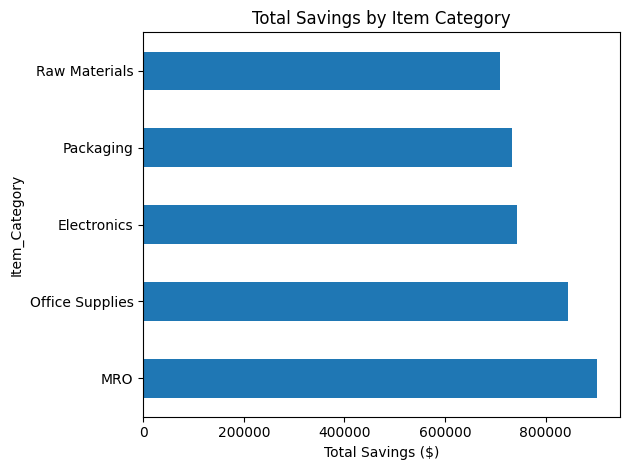

In [98]:
df['Savings_per_Unit'] = df['Unit_Price'] - df['Negotiated_Price']
df['Total_Savings'] = df['Savings_per_Unit'] * df['Quantity']
top_saving_items = df.groupby('Item_Category')['Total_Savings'].sum().sort_values(ascending=False)
top_saving_items.plot(kind='barh', title='Total Savings by Item Category')
plt.xlabel('Total Savings ($)')
plt.tight_layout()
plt.show()



# What is the best way to optimize costs?
#### My code calculates cost savings by determining the difference between the unit price and the negotiated price, and then multiplying it by the quantity purchased. 
#### The resulting graph categorizes items based on total savings and identifying which categories are most cost efficient.
#### The graph not only displays high-performing categories, but also shows the underperforming ones that lay a foundation to improve future purchasing decisions.
#### By identifying which categories and vendors deliver the least value, businesses can proactively manage risk, renegotiate contracts, or switch suppliers. Overall, this analysis supports better procurement strategies, leading to better budget plans and enhanced cost optimization across the organization. 


In [107]:
df['Policy_Violated'] = df['Is_Late'] | (df['Defective_Units'].fillna(0) > 0)
violation_rate = df['Policy_Violated'].mean()

violation_by_supplier = df.groupby('Supplier')['Policy_Violated'].mean().sort_values(ascending=False)
violation_rate, violation_by_supplier.head()

(np.float64(0.9317889317889317),
 Supplier
 Epsilon_Group      0.951807
 Gamma_Co           0.951049
 Beta_Supplies      0.942308
 Alpha_Inc          0.914894
 Delta_Logistics    0.900585
 Name: Policy_Violated, dtype: float64)

# What are the causes of policy violations and how often have they happened?
#### The statistics above reflect the overall violation of policy rate of 93.18%, meaning that all orders either arrived late or defective. This rate is very high and points out systematic issues with the organization such as unreliable delivery schedules, poor quality, control, or weak vendor compliance.
#### This highlights consitant violation rates which impact company efficiency, reduces customer trust, and compromises quality assurance. By quantifying supplier non-compliance, the analysis identifies which vendors require immediate intervention and tracks performance over time. This insight is significant to enforce accountability and ensure supply chain efficiency. 

# 

correlation matrix:                      Quantity  Delivery_Delay_Days  Defective_Units  \
Quantity             1.000000             0.024299         0.459988   
Delivery_Delay_Days  0.024299             1.000000         0.034880   
Defective_Units      0.459988             0.034880         1.000000   
Savings_per_Unit    -0.000609             0.056261        -0.013373   

                     Savings_per_Unit  
Quantity                    -0.000609  
Delivery_Delay_Days          0.056261  
Defective_Units             -0.013373  
Savings_per_Unit             1.000000  


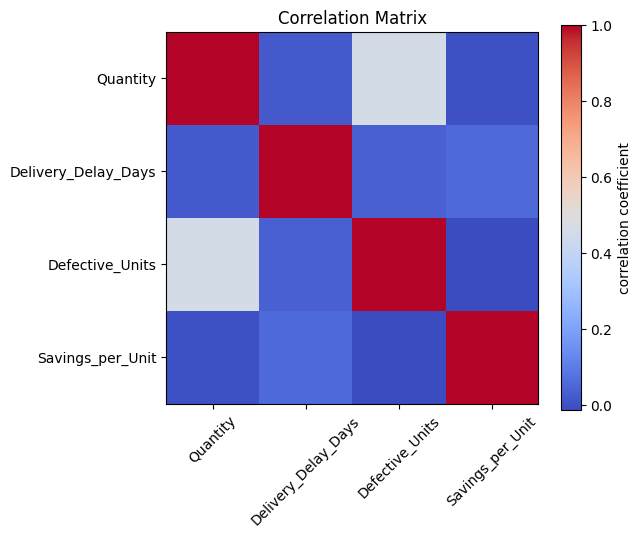

In [109]:
import matplotlib.pyplot as plt

correlation_df = ['Quantity', 'Delivery_Delay_Days', 'Defective_Units', 'Savings_per_Unit']
correlation_matrix = df[correlation_df].corr()

print(f'correlation matrix: {correlation_matrix}')

plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='correlation coefficient')

plt.xticks(range(len(correlation_df)), correlation_df, rotation=45)
plt.yticks(range(len(correlation_df)), correlation_df)

plt.title('Correlation Matrix')

plt.show()

# Are there significant price increases over time for the same items? Savings from bulk orders?
#### The heatmap above uses color intensity to indicate the strength of correlations in the matrix. Birghter colors represent stronger relationships, while darker blues suggest weaker ones
#### This visualization reveals potential business concerns with bulk ordering. Instead of reducing costs, bulk purchases may be contributing to higher expenses, especially if if they coincide with increased defect rates or minimal negotiated price reductions
#### Seasonal fluctuations can also comtribute to the issue by distorting expected savings. While bulk orders are expected to be cost efficient, this data suggests they are not favorable.
#### Overall, the heatmap is crucial in tracking monthly KPI trends as it promotes strategic improvement.

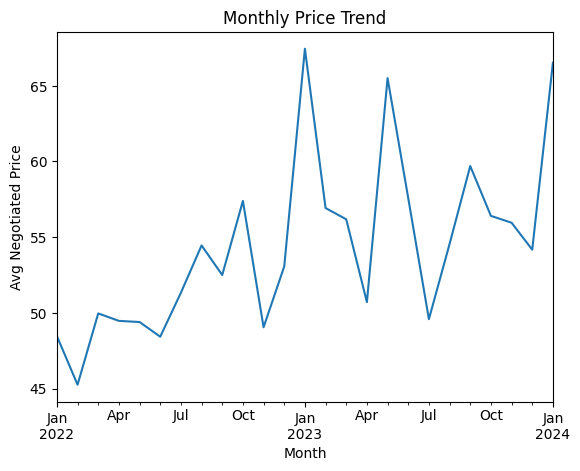

In [110]:
# moving average of negotiated prices over time
df['Month'] = df['Order_Date'].dt.to_period('M')
price_trend = df.groupby('Month')['Negotiated_Price'].mean()

price_trend.plot(title='Monthly Price Trend')
plt.ylabel('Avg Negotiated Price')
plt.show()


# What factors seem to worsen and enhance vendor performance? What could we predict about prices in the near future?



##### The graph above shows the Monthly price trend of  average negotiated price each month. 
##### Business may use this graph to see fluctuations that may reveal inconsistent negotiation strategies,  poor negotiation tactics, supplier overcharging, or material shortages. 
#### Analyzing these patterns can help identify the root causes of prices fluctuations whether it'd be from external factors or supplier relationships
#### This data can also help with timing purchases strategically such as buying bul items during low-demand periods or avoinding price peaks. It can also guide organizations through suplpier contracts and negotiate the best prices. 

In [111]:
# Quality assurance - duplicate, same supplier, item cateegory, close dates
duplicate_orders = df[df.duplicated(subset=['Supplier', 'Item_Category', 'Order_Date'], keep=False)]

missing_orders = df[df['Order_Status'].isin(['Pending', 'Cancelled'])]

duplicate_orders.head(), missing_orders.head()

(       PO_ID       Supplier Order_Date Delivery_Date    Item_Category  \
 17  PO-00018  Epsilon_Group 2022-08-27    2022-09-04    Raw Materials   
 23  PO-00024  Beta_Supplies 2023-10-28    2023-11-03  Office Supplies   
 24  PO-00025  Beta_Supplies 2023-12-20    2024-01-01              MRO   
 27  PO-00028  Epsilon_Group 2022-08-14    2022-08-23    Raw Materials   
 39  PO-00040  Epsilon_Group 2022-12-11           NaT  Office Supplies   
 
            Order_Status  Quantity  Unit_Price  Negotiated_Price  \
 17            Delivered       921       51.48             50.61   
 23  Partially Delivered       393       72.53             66.31   
 24            Delivered      1565       21.30             20.09   
 27            Delivered       435       17.13             15.84   
 39            Delivered       524       46.28             39.65   
 
     Defective_Units Compliance  Predictions  Delivery_Delay_Days  \
 17              NaN        Yes       51.045                  8.0   
 23   

# Are there significant price increases over time for the same items? Savings from bulk orders?
# Are there duplicate purchases that can be consolidated Are there missing orders?

##### When analyzing KPI reports, it's crucial to identify issues such as duplicate or missing orders, as they can significantly impact a company's profitability and operational efficiency. These inconsistencies often reflect gaps in supplier reliability, fulfillment performance, and inventory planning. 
#### The tables above highlight vendors who have partially delivered, cancelled, or fulfilled an incomplete delivery.
#### In the tables above, we can see the Epsilon_Group abd Beta_Supplies were seen in both groups and both had orders cancelled, which reflects their lack of reliability compared to the other vendors.
#### Since delivered orders may benefit from negotiated prices lower than the unit price, organizations can use these insights to renegotiate future prices and terms with underperforming vendors, which enhances cost savings and operational efficiency. 

